# **DESAFÍO Nº3: VARIABLES ALEATORIAS I - TABAQUISMO Y GESTACIÓN**
### **Análisis Estadístico con Python**
#### *Carrera Data Science - G-93 - Desafio Latam*
#### Estudiante: Felipe Leal Arancibia

En este desafío validaremos nuestros conocimientos sobre variables aleatorias. Para lograrlo, necesitarás aplicar lo visto en clases.

Lee todo el documento antes de comenzar el desarrollo individual, para asegurarte de tener el máximo de puntaje y enfocar bien los esfuerzos.

Tiempo asociado: 2 horas cronológicas

## Descripción

#### Un grupo de investigadores está interesado en analizar la relación entre el hábito de fumar con el crecimiento de los bebés en edad gestacional. Para esto han recopilado los datos guardados en el dataset baby.csv, que contiene los siguientes campos de datos:
##### - Birth.Weight : Peso del bebe
##### - Gestational.Days: Días de gestación
##### - Maternal.Age: Edad de la madre
##### - Maternal.Height: Altura de la madre
##### - Maternal.Pregnancy.Weight: Peso de la madre
##### - Maternal.Smoker: ¿Es la madre fumadora? (True: fumadora, False: no es fumadora)


#### A partir de estos datos se solicita:

In [20]:
# Primero importar todas las potenciales librería sa utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


#### 1. Realiza una exploración de los datos, considerando sus tipos y los descriptivos correspondientes.

In [23]:
# Se importa base de datos
estudio_gestacional = pd.read_csv('baby.csv', delimiter=',')


In [22]:
# Podemos revisar globalmente el dataframe
estudio_gestacional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Unnamed: 0                 1174 non-null   int64
 1   Birth.Weight               1174 non-null   int64
 2   Gestational.Days           1174 non-null   int64
 3   Maternal.Age               1174 non-null   int64
 4   Maternal.Height            1174 non-null   int64
 5   Maternal.Pregnancy.Weight  1174 non-null   int64
 6   Maternal.Smoker            1174 non-null   bool 
dtypes: bool(1), int64(6)
memory usage: 56.3 KB


In [24]:
# Revisión del tipo de valores que contiene el DF
estudio_gestacional.tail(3)

,Unnamed: 0,Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight,Maternal.Smoker
1171,1172,130,291,30,65,150,True
1172,1173,125,281,21,65,110,False
1173,1174,117,297,38,65,129,False


In [15]:
# Se puede revisar si hay datos nulos
estudio_gestacional.isnull().sum()

Unnamed: 0                   0
Birth.Weight                 0
Gestational.Days             0
Maternal.Age                 0
Maternal.Height              0
Maternal.Pregnancy.Weight    0
Maternal.Smoker              0
dtype: int64

### R. Hasta el momento, se ve que el dataset contiene 1.174 entradas (filas), y no se registraron datos nulos.
### Reconozco 5 variables numéricas (presumiblemente discretas, ya que no se ven ni decimales, ni números negativos ni otro elemento de los números reales que no sea entero, pero que para efectos de este ejercio, se asumirán las 2 variables de peso -"weight"- y 1 de altura -"height"- como variables continuas, al no saber a ciencia cierta la unidad de medida utilizada).

### Por último se identifica un 1 boleano: falso o verdadero. 


In [25]:
# Sondeo general de medidas de tendencia central y de dispersión
descripcion_estudio = round(estudio_gestacional.describe(), 2)

descripcion_estudio

,Unnamed: 0,Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight
count,1174.00,1174.00,1174.00,1174.00,1174.00,1174.00
mean,587.50,119.46,279.10,27.23,64.05,128.48
std,339.05,18.33,16.01,5.82,2.53,20.73
min,1.00,55.00,148.00,15.00,53.00,87.00
25%,294.25,108.00,272.00,23.00,62.00,114.25
50%,587.50,120.00,280.00,26.00,64.00,125.00
75%,880.75,131.00,288.00,31.00,66.00,139.00
max,1174.00,176.00,353.00,45.00,72.00,250.00


In [26]:
# limpiar un poco el dataframe, sacando columna "Unnamed:0" y fila "Count" (sabiendo que hay 1174 casos)

df_descripcion_estudio = descripcion_estudio.iloc[1:,1:]
df_descripcion_estudio

,Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight
mean,119.46,279.10,27.23,64.05,128.48
std,18.33,16.01,5.82,2.53,20.73
min,55.00,148.00,15.00,53.00,87.00
25%,108.00,272.00,23.00,62.00,114.25
50%,120.00,280.00,26.00,64.00,125.00
75%,131.00,288.00,31.00,66.00,139.00
max,176.00,353.00,45.00,72.00,250.00


Algunos de los datos a comentar son:

- En todos los casos, el promedio se aproxima a la mediana.
- La edad del 75% de la muestra es de 31 años, siendo su tope máximo 45 años.
- Las mayores desviación estándar son para el peso al nacer (18.33), y el peso materno del embarazo (20.73) 

In [42]:
# Conteo simple de frecuencias en columna boobleana Maternal.Smoker
conteo_maternal_smoker = estudio_gestacional['Maternal.Smoker'].value_counts()
conteo_maternal_smoker


Maternal.Smoker
False    715
True     459
Name: count, dtype: int64

#### Para terminar con la exploración general, propongo visualizar los datos existentes para pulir impresiones

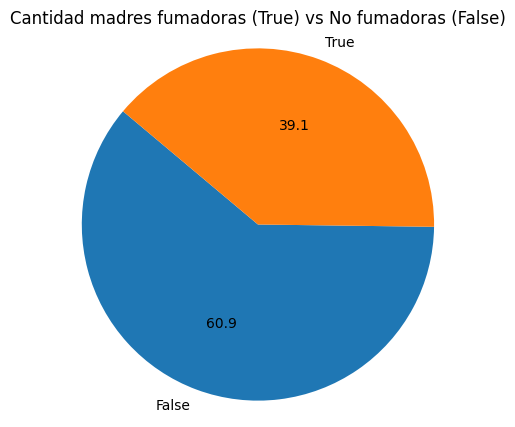

In [45]:
# Gráfico de torta para comparar madres fumadoras

plt.figure(figsize=(5, 5))
plt.pie(conteo_maternal_smoker, labels=conteo_maternal_smoker.keys(), autopct='%.1f', startangle=140)

# Título
plt.title('Cantidad madres fumadoras (True) vs No fumadoras (False)')

# Mostrar el gráfico
plt.axis('equal')  # Para que el gráfico sea un círculo
plt.show()

#### En el gráfico anterior se puede apreciar que la mayor parte de las pacientes del dataset son no fumadoras(61%), en contraste con las fumadoras (39%).

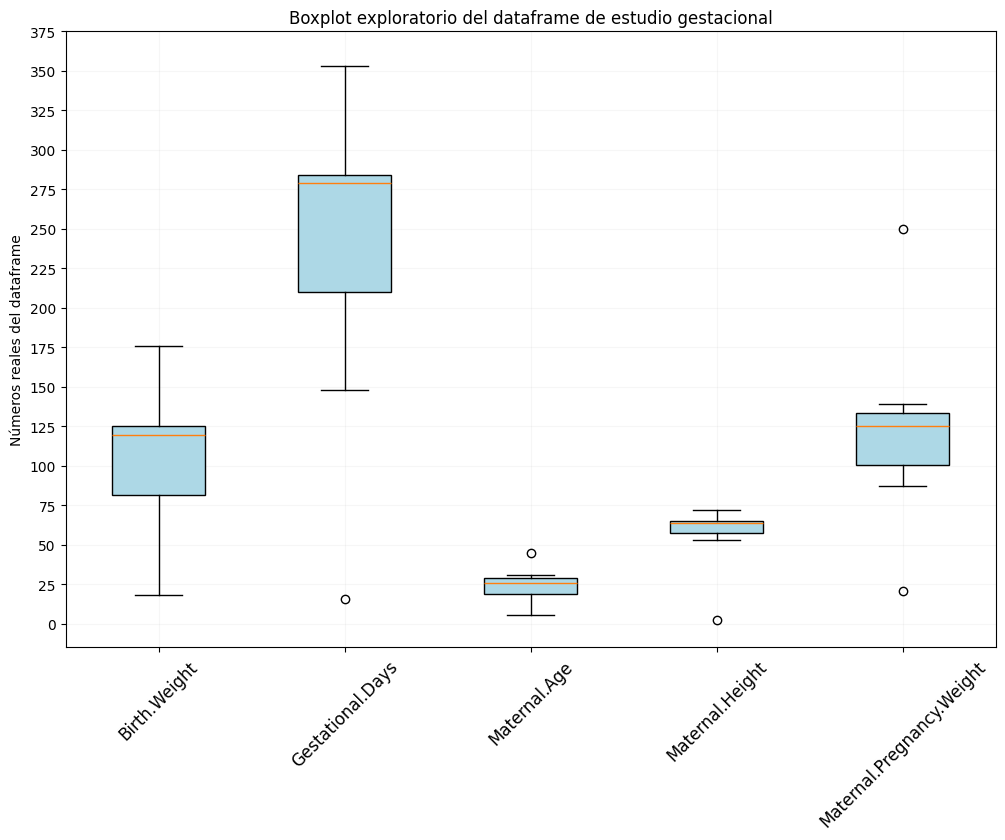

In [46]:
# Explorar el dataset a través de Gráfico de bigotes

plt.figure(figsize=(12, 8))
plt.boxplot(df_descripcion_estudio.values, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.grid(True, alpha=0.1)
plt.title('Boxplot exploratorio del dataframe de estudio gestacional')
plt.ylabel('Números reales del dataframe')
plt.xticks(range(1, len(df_descripcion_estudio.columns) + 1), df_descripcion_estudio.columns, fontsize=12, rotation=45)
plt.yticks(range(0, int(df_descripcion_estudio.values.max()) + 25, 25))
plt.show()

#### En este gráfico de bigotes se observa la dispersión general de los datos de cada variable, teniendo en común que sus medianas tienden a desplazarse a las alturas de la caja. 

#### Se observa cierta asimetría en la distribución de los datos, a exepción de Birth.Weight, Maternal.Age y Materrnal.Pregnancy.Weight.



-
-
-
___0___o___
-
-
-

#### **2. Considera los pesos de los bebés. ¿Se puede decir que siguen una distribución normal? Justifica tu respuesta creando los gráficos y modelos necesarios.**

#### R2: Para indagar en una respuesta, se deben considerar el promedio y la desviación estándar, que son claves para identificar una distribución normal.    

In [47]:
# Ojo, supuse que era en libras, pero al convertir daba peso de bebé de 50 kg promedio, así que opté por dejar tal cual los valores
peso_bebes = estudio_gestacional['Birth.Weight']

media_peso_bebes = round(peso_bebes.mean(), 2)
print(f"Promedio peso bebés: {media_peso_bebes}")

de_peso_bebes = round(peso_bebes.std(),2)
print(f"Desviación estándar peso bebés: {de_peso_bebes}")

min_peso_bebes = peso_bebes.min()
print(f"Mínimo peso bebés: {min_peso_bebes}")

max_peso_bebes = peso_bebes.max()
print(f"Máximo peso bebés: {max_peso_bebes}")


Promedio peso bebés: 119.46
Desviación estándar peso bebés: 18.33
Mínimo peso bebés: 55
Máximo peso bebés: 176


In [50]:
# Se crea un eje x con rango de valores equidistantes, entre el mínimo y el maximo del peso bebés

eje_x = np.linspace(min_peso_bebes, max_peso_bebes)

eje_x

array([ 55.        ,  57.46938776,  59.93877551,  62.40816327,
        64.87755102,  67.34693878,  69.81632653,  72.28571429,
        74.75510204,  77.2244898 ,  79.69387755,  82.16326531,
        84.63265306,  87.10204082,  89.57142857,  92.04081633,
        94.51020408,  96.97959184,  99.44897959, 101.91836735,
       104.3877551 , 106.85714286, 109.32653061, 111.79591837,
       114.26530612, 116.73469388, 119.20408163, 121.67346939,
       124.14285714, 126.6122449 , 129.08163265, 131.55102041,
       134.02040816, 136.48979592, 138.95918367, 141.42857143,
       143.89795918, 146.36734694, 148.83673469, 151.30612245,
       153.7755102 , 156.24489796, 158.71428571, 161.18367347,
       163.65306122, 166.12244898, 168.59183673, 171.06122449,
       173.53061224, 176.        ])

In [51]:
# Se usa la función PDF para generar un modelo de distribución de probabilidad normal
# Se usará la librería scipy importada al comienzo como stats, y su función norm

pdf_peso_bebes = stats.norm.pdf(eje_x, loc=media_peso_bebes, scale=de_peso_bebes)



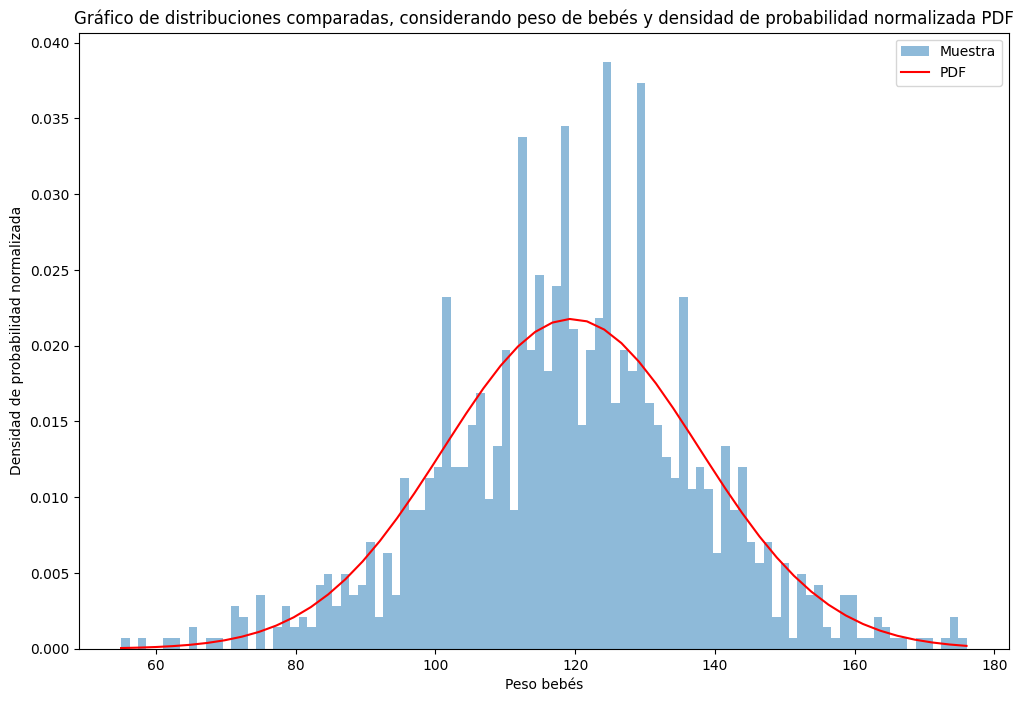

In [52]:
plt.figure(figsize=(12, 8))
plt.hist(peso_bebes, bins=100, density=True, alpha=0.5, label='Muestra')
plt.plot(eje_x, pdf_peso_bebes, color='red', label='PDF')
plt.xlabel('Peso bebés')
plt.ylabel('Densidad de probabilidad normalizada')
plt.title('Gráfico de distribuciones comparadas, considerando peso de bebés y densidad de probabilidad normalizada PDF')
plt.legend()
plt.show()

### Con el ejercicio anterior podemos ver que el peso de nacimiento de los bebés tiende a una distribución normal, daddo que el grueso de los nacimientos presentan un peso promedio central, y los extremos poco a poco van disminuyendo con cierta uniformidad. 

-
-
-
___0___o___
-
-
-

#### 3. Considerando lo anterior, verifica el modelo de distribución normal de los pesos para 5 valores diferentes. Compara con los datos reales.

In [14]:
# Tomaré 5 valores random de la columna original para comparar ese modelo generado con los datos reales explorados anteriormente

v_random_peso_bebes = peso_bebes.sample(n=5, replace=False).values

v_random_peso_bebes





array([143, 131, 142, 122, 140])

In [15]:
# Ahora, se establece la comparación de percentiles a través de un ciclo, 
# Se usa como modelo la función CDF, que muestra la probabilidad acumulada de que una variable aleatoria tome valor igual o menor al argumento que recibe. 

for i in v_random_peso_bebes:
  percentil_real=round(stats.percentileofscore(peso_bebes,i),2)
  percentil_teorico=round(100 * stats.norm.cdf(i, loc=media_peso_bebes, scale=de_peso_bebes),2)
  print(f'- Valor random de peso de bebé: {i}. Percentil real: {percentil_real}. Percentil teórico: {percentil_teorico}')

- Valor random de peso de bebé: 143. Percentil real: 90.63. Percentil teórico: 90.05
- Valor random de peso de bebé: 131. Percentil real: 75.21. Percentil teórico: 73.55
- Valor random de peso de bebé: 142. Percentil real: 89.69. Percentil teórico: 89.06
- Valor random de peso de bebé: 122. Percentil real: 54.64. Percentil teórico: 55.51
- Valor random de peso de bebé: 140. Percentil real: 88.07. Percentil teórico: 86.88


#### R3: A partir de los valores obtenidos, se puede apreciar que se logran cercanías en los resultados teóricos y reales en cuanto a los percentiles, por lo que se verifica que los datos reales tienen coherencia con una distribución normal.

-
-
-
___0___o___
-
-
-

#### 4. Compara los pesos de los bebés de madres fumadoras y no fumadoras. ¿Qué diferencias existen? Explica y construye los modelos correspondientes.

In [18]:
estudio_gestacional.columns

Index(['Unnamed: 0', 'Birth.Weight', 'Gestational.Days', 'Maternal.Age',
       'Maternal.Height', 'Maternal.Pregnancy.Weight', 'Maternal.Smoker'],
      dtype='object')

In [19]:
# Realizo un filtro de las variabes de interés del dataset con loc
comparacion_var = estudio_gestacional.loc[:,['Birth.Weight','Maternal.Smoker']]
comparacion_var

,Birth.Weight,Maternal.Smoker
0,120,False
1,113,False
2,128,True
3,108,True
4,136,False
...,...,...
1169,113,False
1170,128,False
1171,130,True
1172,125,False


In [20]:
# Cambio de nombre de valores booleanos
comparacion_var['Maternal.Smoker'] = comparacion_var['Maternal.Smoker'].replace({ True: 'Madre fumadora', False: 'Madre NO fumadora'})

comparacion_var


,Birth.Weight,Maternal.Smoker
0,120,Madre NO fumadora
1,113,Madre NO fumadora
2,128,Madre fumadora
3,108,Madre fumadora
4,136,Madre NO fumadora
...,...,...
1169,113,Madre NO fumadora
1170,128,Madre NO fumadora
1171,130,Madre fumadora
1172,125,Madre NO fumadora


In [21]:
# Ambas variables se pueden agrupar para generar un cruce más eficiente 

comparacion_pesobebe_madrefumadora = comparacion_var.groupby('Maternal.Smoker')['Birth.Weight']

round(comparacion_pesobebe_madrefumadora.describe().T, 2)

Maternal.Smoker,Madre NO fumadora,Madre fumadora
count,715.00,459.00
mean,123.09,113.82
std,17.42,18.30
min,55.00,58.00
25%,113.00,101.00
50%,123.00,115.00
75%,134.00,126.00
max,176.00,163.00


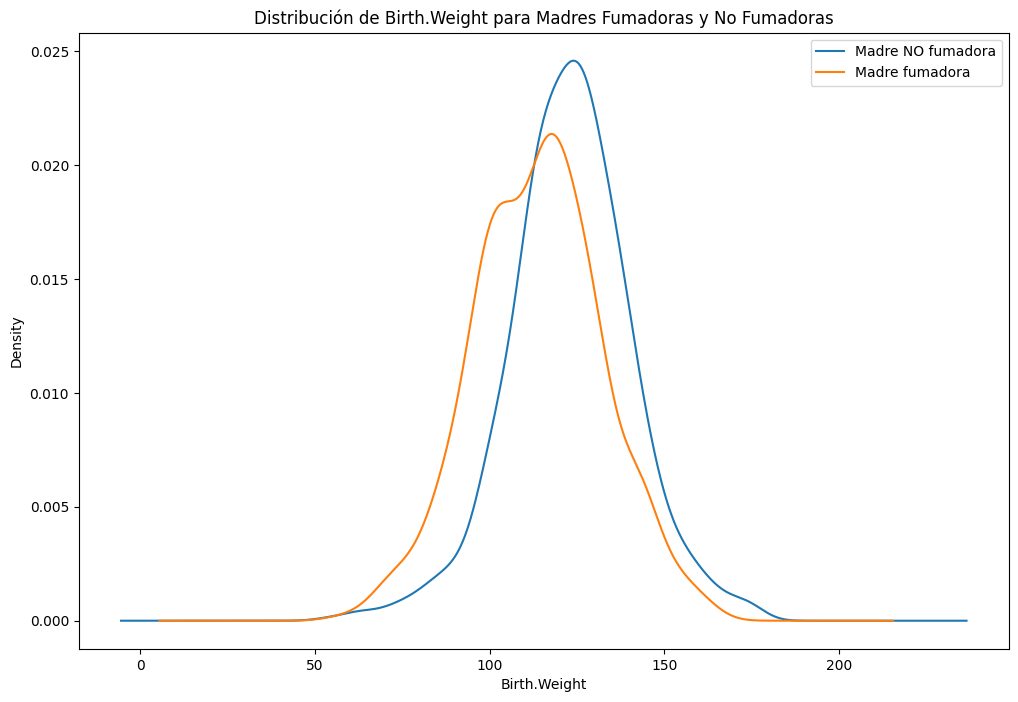

In [22]:
# A partir de los datos comparados, se puede generar un gráfico para evaluar diferencias entre grupos


plt.figure(figsize=(12, 8))

# Iterar sobre cada grupo y graficar la densidad
for nombre, grupo in comparacion_pesobebe_madrefumadora:
    grupo.plot(kind='density', label=nombre)

# Agregar título y leyenda
plt.title('Distribución de Birth.Weight para Madres Fumadoras y No Fumadoras')
plt.xlabel('Birth.Weight')
plt.legend()

# Mostrar el gráfico
plt.show()

#### R4: Si bien se puede apreciar que la distribución normal de pesos de bebé se da en ambos casos (madre fumadora y madre no fumadora), se distingue que la madre NO fumadora logran que sus hijos tengan mayor peso comparado, tanto en el mímino como en el máximo caso, además de su promedio y desviación estándar..   

In [23]:
m_fumadora= comparacion_var[comparacion_var['Maternal.Smoker']=='Madre fumadora']
m_no_fumadora= comparacion_var[comparacion_var['Maternal.Smoker']=='Madre NO fumadora']

comparacion_var['Maternal.Smoker'].value_counts()

Maternal.Smoker
Madre NO fumadora    715
Madre fumadora       459
Name: count, dtype: int64

123.08531468531469 17.423695021009415


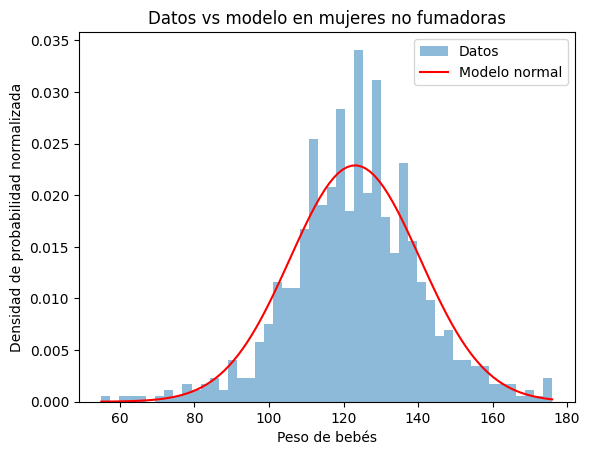

In [24]:
# Se visualiza el primer caso, de madres no fumadoras
var_no_fumadora = m_no_fumadora['Birth.Weight']

mu_no_fumadora=var_no_fumadora.mean()
sigma_no_fumadora=var_no_fumadora.std()
minimo_no_fumadora=var_no_fumadora.min()
maximo_no_fumadora=var_no_fumadora.max()
print(mu_no_fumadora,sigma_no_fumadora)

x = np.linspace(minimo_no_fumadora, maximo_no_fumadora,100)
pdf = stats.norm.pdf(x, loc=mu_no_fumadora, scale=sigma_no_fumadora) 
# Histograma de la data
plt.hist(var_no_fumadora, bins=50, density=True, alpha=0.5, label='Datos')
plt.plot(x, pdf, color='red', label='Modelo normal')
plt.xlabel('Peso de bebés')
plt.ylabel('Densidad de probabilidad normalizada')
plt.title('Datos vs modelo en mujeres no fumadoras')
plt.legend()
plt.show()

113.81917211328977 18.295010373139487


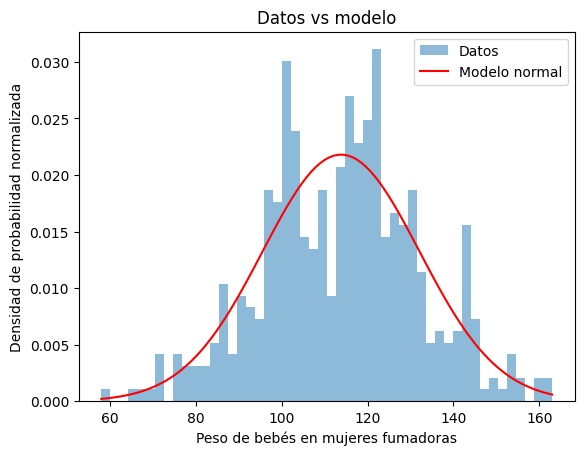

In [25]:
# Se ve ahora el segundo caso, de madres FUMADORAS
var_fumadora = m_fumadora['Birth.Weight']

mu=var_fumadora.mean()
sigma=var_fumadora.std()
minimo=var_fumadora.min()
maximo=var_fumadora.max()
print(mu,sigma)

x = np.linspace(minimo, maximo,100)
pdf = stats.norm.pdf(x, loc=mu, scale=sigma) # creamos la funcion de distribución normal
# Histograma de la data
plt.hist(var_fumadora, bins=50, density=True, alpha=0.5, label='Datos')
plt.plot(x, pdf, color='red', label='Modelo normal')
plt.xlabel('Peso de bebés en mujeres fumadoras')
plt.ylabel('Densidad de probabilidad normalizada')
plt.title('Datos vs modelo')
plt.legend()
plt.show()

### R3: Considerando las dos gráficas realizadas con modelos PDF, se vuelve a apreciar que las madres no fumadoras presentran una distribución más armónica, con más altas densidades de peso de bebé que las de mujeres fumadoras.

-
-
-
___0___o___
-
-
-

#### 5. Considerando los datos dados:
##### ● Calcula la probabilidad de que una madre escogida al azar fume.


In [26]:
# p = numero casos favorables / numero posibilidades

casos_madres_fumadoras = var_fumadora.count()

casos_madres_no_fumadoras = var_no_fumadora.count()


prob_madre_fumadora = casos_madres_fumadoras / (casos_madres_fumadoras + casos_madres_no_fumadoras)

print(f"La probabilidad de que una madre al azar fume es de: {prob_madre_fumadora}")



La probabilidad de que una madre al azar fume es de: 0.3909710391822828


##### ● A partir del valor anterior, construye un modelo de distribución binomial que modele el experimento correspondiente a escoger 5 madres al azar y observar cuántas fuman.


In [29]:
# Recordar que el binomial es cuanrdo es más de un evento, a diferencia del Bernoulli

# parámetros

n = 5  # madres escogidas
prob_madre_fumadora

# Modelo binom
experimento = [stats.binom.pmf(k,n,prob_madre_fumadora) for k in range(n+1)]

# Se crea ciclo para iterar sobre respuesta 

for k, prob in enumerate(experimento):
    print(f"- La probabilidad de que {k} madres fumen es de: {prob}")


- La probabilidad de que 0 madres fumen es de: 0.08378952423224333
- La probabilidad de que 1 madres fumen es de: 0.2689467945636342
- La probabilidad de que 2 madres fumen es de: 0.34530511525792457
- La probabilidad de que 3 madres fumen es de: 0.2216713956690732
- La probabilidad de que 4 madres fumen es de: 0.07115186756091231
- La probabilidad de que 5 madres fumen es de: 0.009135302716212245


##### ● Utilizando este modelo, simula 1000 muestras de tamaño 8, y calcula sus medias muestrales.


##### ● Utilizando los datos directamente, extrae 1000 muestras de tamaño 8 y calcula sus respectivas medias muestrales.

#### Utilizando lo anterior:




##### ● compara gráficamente los resultados obtenidos anteriormente.


##### ● verifica el teorema del límite central, considerando las muestras de datos reales y las simuladas con el modelo binomial.


##### ● construye un modelo de distribución normal derivado del modelo binomial, y grafícalo junto a los anteriores para comparar. Concluye.

-
-
-
___0_FiN__o___
-
-
-

### Requerimientos

1. Conoce y aplica la distribución normal de datos, con sus respectivos parámetros. (3 puntos)

2. Relaciona las distribuciones reales de datos con modelos de distribución binomial y normal. (4 puntos)

3. Comprende y verifica la ley de los grandes números y el teorema del límite central. (3 puntos)